In [34]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

genres = ['disco', 'reggae', 'pop', 'rock',
          'metal', 'jazz', 'blues', 'hiphop', 'country']

chroma_type = ['stft', 'cqt', 'cens']

binary_template_C_major = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
binary_template_C_minor = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]

In [32]:
def get_GTZAN_keys(genres):
    """
    Get keys for each song in each genres in GTZAN dataset. The path of the set is fixed.
    
    :param: None
    :return: A dict that contains the true key of each genres.
    
    Example:
        key0 = d['disco'][0]
        # key0 == 12
    """
    
    d = {}
    for g in enumerate(genres):
        
        genres_key_path = "data/GTZAN/key/" + g + "/" + g + "."
        
        # Initial the dict
        with open(genres_key_path + "00000.lerch.txt") as f:
            d[g] = [f.readline().rstrip()]
        
        for i in range(1, 100): 
            # 100 is the numbers songs of each genres'data 
            
            with open("data/GTZAN/key/" + g + "/" + g + "." + str(i).zfill(5) + ".lerch.txt") as f:
                # 5 is the length of numbers in each file name
                d[g] += (f.readline().rstrip())
    return d
    
GTZAN_keys = get_GTZAN_keys(genres)

In [53]:
def create_GTZAN_Chroma(genres):
    """
    Create chroma file from wav and save them to result/GTZAN/
    
    I am not sure if save chroma to txt and read it makes error. Needs to test later.
    
    :param: genres(list): The list of genres. 
    :return: None
    """
    
    if(not os.path.isdir('result/GTZAN/')):
        for g in genres:
            genres_wav_path = "data/GTZAN/wav/" + g + "/" + g + "."

            for i in range(100):
                # 100 is the numbers songs of each genres'data 

                filename = genres_wav_path + str(i).zfill(5) + ".wav"
                y, sr = librosa.load(filename)

                # STFT chromagram
                chroma_stft = librosa.feature.chroma_stft(
                    y=y, sr=sr, n_chroma=12, n_fft=4096)
                # Why is n_fft=4096?
                
                # CQT chromagram
                chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
                
                # Chroma Energy Normalized chromagram
                chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

                
                # Create new files for three types of chroma
                
                filename = "result/GTZAN/" + g + "/stft/" + g + "." + str(i).zfill(5) + ".chroma_stft.txt"
                os.makedirs(os.path.dirname(filename), exist_ok=True)
                with open(filename, mode='w') as f:
                    np.savetxt(filename, chroma_stft)
                    
                filename = "result/GTZAN/" + g + "/cq/" + g + "." + str(i).zfill(5) + ".chroma_cq.txt"
                os.makedirs(os.path.dirname(filename), exist_ok=True)
                with open(filename, mode='w') as f:
                    np.savetxt(filename, chroma_cq)
                    
                filename = "result/GTZAN/" + g + "/cens/" + g + "." + str(i).zfill(5) + ".chroma_cens.txt"
                os.makedirs(os.path.dirname(filename), exist_ok=True)
                with open(filename, mode='w') as f:
                    np.savetxt(filename, chroma_cens)
                    
    return
    
create_GTZAN_Chroma(genres)

In [62]:
def get_GTZAN_Chroma(genres:str, chroma_type:str, index:int):
    """
    Get chroma from txt
    
    :return: (ndarray)
    """
    filename = "result/GTZAN/" + genres + "/" + chroma_type + "/" + genres + "." + str(index).zfill(5) + ".chroma_" + chroma_type + ".txt"
    with open(filename, mode='r') as f:
        return np.loadtxt(filename)

In [63]:
c = get_GTZAN_Chroma("blues", "cens", 3)

In [64]:
c

array([[0.09850565, 0.10319287, 0.10742456, ..., 0.14251204, 0.14610457,
        0.14954896],
       [0.36614746, 0.36859646, 0.37060234, ..., 0.15135622, 0.15341689,
        0.15560417],
       [0.67518032, 0.66633964, 0.65670902, ..., 0.21078545, 0.21136613,
        0.21217498],
       ...,
       [0.04170194, 0.03871404, 0.03584089, ..., 0.01302016, 0.00934181,
        0.00622329],
       [0.        , 0.        , 0.        , ..., 0.01743154, 0.0191175 ,
        0.02090677],
       [0.01698467, 0.02183109, 0.0271411 , ..., 0.11008056, 0.11295044,
        0.11627812]])

txt_file_path =  blues.00000.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.3604103534043769, 0.3514996840732355, 0.4309981801011942, 0.22645904765661, 0.23256416692490683, 0.33145288448551724, 0.3589472367479743, 0.46065260009186115, 0.2833511747653205, 0.295808888389819, 0.3929621343877619, 0.3743337644667459]
G Major
prediction 22
answer 22
True
txt_file_path =  blues.00001.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.46446537700202967, 0.3047986874145824, 0.29293715268029913, 0.16675499781868253, 0.15864201816777018, 0.30623529325884014, 0.3522528697727918, 0.5814795769493212, 0.3412208942723823, 0.19085769544082584, 0.2552745358925529, 0.30740560461858496]
G# Major
prediction 23
answer 19
False
txt_file_path =  blues.00002.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.27030905302360436, 0.15574655849853933, 0.2876320860484775, 0.3702706504463343, 0.5652650188761262, 0.31776625213515064, 0.2811812287951371, 0.28039010593844815, 0.31241853926719754, 0.3997180872

(12, 1293)
[0.3736066857862181, 0.18452041967397761, 0.18161875791004978, 0.1887075724938239, 0.2553900196107158, 0.5130292956778716, 0.27427824238347276, 0.239356147445528, 0.23946034232676153, 0.30737407401395705, 0.2388036131602406, 0.18978433565766756]
F Major
prediction 20
answer 20
True
txt_file_path =  blues.00023.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.20150583828210597, 0.27949309743413586, 0.16720015840202984, 0.1947921644143576, 0.4935717141883821, 0.16400274203723614, 0.11985265442792525, 0.1475508546070264, 0.2560479521698463, 0.6638818673213457, 0.2573934763134079, 0.1570038964825323]
E Major
prediction 19
answer 12
False
txt_file_path =  blues.00024.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.25157152558586865, 0.19055524514708957, 0.2220679736240246, 0.15943347965540455, 0.1924397643065899, 0.23608600355781365, 0.10307647713718159, 0.06659437788766809, 0.10088762823724219, 0.233478248524512, 0.5996050463194548, 0.5049902600847035]
F# Major
predicti

(12, 1293)
[0.2662013717141933, 0.4006473540659052, 0.382348143340759, 0.4846074047677755, 0.2486296028290621, 0.20845954781448597, 0.2955171837361943, 0.33279718784651413, 0.4814836201232794, 0.4423366128787548, 0.4891327621900726, 0.25144675842753544]
G# Major
prediction 23
answer 18
False
txt_file_path =  blues.00045.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.32959503353172187, 0.29937238998679416, 0.24192423028158339, 0.3568905625810698, 0.20726345934201398, 0.25587583525712787, 0.3536562125622788, 0.40692707150022095, 0.5352571888107227, 0.5032574675209411, 0.5850498905197962, 0.3584751023904457]
G# Major
prediction 23
answer 18
False
txt_file_path =  blues.00046.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.2372825732735567, 0.3546415517124299, 0.3255423307469243, 0.4588323575568768, 0.2357493368174077, 0.19515174499490318, 0.30847586147909967, 0.3571698236907994, 0.5020747422853363, 0.363449447849702, 0.3505956764498254, 0.18850337528844766]
G# Major
prediction 

(12, 1293)
[0.32635515854943886, 0.3091415417602477, 0.44056434066907113, 0.2671260973729434, 0.3790190361657346, 0.33702454997146647, 0.29945033409885563, 0.36101149658424736, 0.2650035509963182, 0.42917951081043193, 0.46616992622337317, 0.46075229836254733]
F Major
prediction 20
answer 22
False
txt_file_path =  blues.00067.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.2776489032193664, 0.2198772676239022, 0.3405038927435408, 0.24604698670567038, 0.4266622124269694, 0.2988794866271536, 0.29385696531886385, 0.633028414271115, 0.3468337081450528, 0.28641559066912137, 0.25080648099168795, 0.2686006421403713]
C Major
prediction 15
answer 22
False
txt_file_path =  blues.00068.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.36713640587598845, 0.18207256338103153, 0.2068700620948502, 0.15470509456826428, 0.24258242480958145, 0.6002314241177331, 0.20613251570597788, 0.24602645107747356, 0.2724835391668495, 0.38132807602515273, 0.23243612475399353, 0.18370909828365667]
F Major
pred

(12, 1293)
[0.3231203807226173, 0.3900683220362108, 0.485322409381835, 0.2502224822083887, 0.18326816157213133, 0.226888171305854, 0.29486996621831285, 0.3569470232461377, 0.3165672382560241, 0.36796781334814266, 0.40329074161865497, 0.2977493263623329]
A# Major
prediction 1
answer -1
False
txt_file_path =  blues.00089.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.2808186844958616, 0.17625747990671312, 0.13764697529482875, 0.18391054940325505, 0.22591283228753453, 0.14298589349936294, 0.1912328357739775, 0.3392616930285905, 0.39688888760334007, 0.5019226125529725, 0.317677929609303, 0.3320073016601552]
G Major
prediction 22
answer 12
False
txt_file_path =  blues.00090.lerch.txt
genres blues
(661794,)
22050
(12, 1293)
[0.23152214966009227, 0.24718428436578133, 0.2455366653594068, 0.3214855134445376, 0.4481312946316679, 0.3226748926238044, 0.37607845025783876, 0.29792775066241, 0.3205579207491271, 0.3582596615844961, 0.31581824531469693, 0.37656721390709236]
E Major
prediction 19


(12, 1293)
[0.3563665614111532, 0.2087871754469605, 0.22554615020574764, 0.19826972247859462, 0.35135587040505645, 0.2922468556059497, 0.23232412086554846, 0.4294240747642187, 0.23932700757061873, 0.2567108029614715, 0.16640136994996627, 0.2276874478811496]
C Major
prediction 15
answer 3
False
txt_file_path =  country.00011.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.20925114219698535, 0.24867581645309872, 0.4032160645991503, 0.21762398531576166, 0.21888106926621642, 0.19780213024797838, 0.3259723150208794, 0.36856717416149226, 0.19825187173489428, 0.29788350941914393, 0.22029822395087348, 0.29324661127535795]
D Major
prediction 17
answer 10
False
txt_file_path =  country.00012.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.41885962460207343, 0.23197495403403542, 0.24660495017660236, 0.1896783149961817, 0.35582323322772735, 0.36547086845754956, 0.28698081049955776, 0.45750096610373453, 0.19466422081201815, 0.15201983721609885, 0.13534232129325569, 0.25982625481160465

(12, 1293)
[0.2226641118938459, 0.1992493917098109, 0.13109634159966924, 0.26560959668019, 0.48245115648329906, 0.21137732702573186, 0.2121612444950004, 0.1370989161690125, 0.23230718835692762, 0.2637060683691328, 0.277021712082606, 0.4998146297283361]
B Major
prediction 2
answer 7
False
txt_file_path =  country.00033.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.20174357543316973, 0.24071372767155147, 0.1886686925784946, 0.35197329810551853, 0.3554913942907034, 0.25234094445236394, 0.4774240810720845, 0.2607819461476199, 0.36008167671823366, 0.22702257026473818, 0.2646968530167589, 0.4623609531419791]
B Major
prediction 2
answer 7
False
txt_file_path =  country.00034.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.2656381577364985, 0.31541751936576506, 0.4323062049095322, 0.28179777665920874, 0.377358067133201, 0.32091407176454345, 0.3686344180103429, 0.2928088071157512, 0.26361416856205844, 0.4949761725658204, 0.29220437401601695, 0.2935782765007339]
D Major
predictio

(12, 1293)
[0.20843758716587227, 0.13868471533286963, 0.32141667034776633, 0.40344213241673804, 0.21180053320349598, 0.29734942954493154, 0.1598534120087586, 0.2876428195795049, 0.27769447260821484, 0.2147797586415064, 0.4116695262704186, 0.18558660584641656]
D# Major
prediction 18
answer 6
False
txt_file_path =  country.00055.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.25383086108918784, 0.29613846238005304, 0.20209380198120264, 0.39113763839507737, 0.44379906354606014, 0.23296853453237837, 0.30402676457264055, 0.2577783359295335, 0.46273880732682954, 0.3402123791889532, 0.27939614695651716, 0.4751492445087039]
E Major
prediction 19
answer 7
False
txt_file_path =  country.00056.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.34609000166706677, 0.1672098562639993, 0.14046929590462556, 0.0779308337935773, 0.22853133206314077, 0.6110914070317659, 0.2462445870308351, 0.22273081916291482, 0.1949879472696403, 0.3923188646875714, 0.29864192225092306, 0.1774780393112811]
F M

(12, 1293)
[0.1906285755154774, 0.2538939027064563, 0.4095803059505015, 0.2376690222575615, 0.3193425620720223, 0.21280725723674862, 0.2556776340346069, 0.18664463916224444, 0.2015645629384217, 0.48089063847192604, 0.23312574720308357, 0.2722582050546217]
A Major
prediction 0
answer 5
False
txt_file_path =  country.00077.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.6051161376469857, 0.22207716357449828, 0.2476240816621192, 0.1928161378072579, 0.33992640693273685, 0.5204046545456591, 0.23302652690435738, 0.4103400320058137, 0.2756936246815893, 0.3969409280663323, 0.21637766638213202, 0.272674855896418]
C Major
prediction 15
answer 8
False
txt_file_path =  country.00078.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.2601060775725916, 0.3287980907170962, 0.2692746699838816, 0.28482157157677135, 0.38515122973378846, 0.2295287181383787, 0.27118379385437463, 0.1768495738554936, 0.26963716092478407, 0.3600831212885015, 0.31356005612126936, 0.4047869227877735]
E Major
predict

(12, 1293)
[0.32306413006322704, 0.15431053989530127, 0.20721985326596584, 0.1337536778906036, 0.27331874518353083, 0.3077525300923566, 0.2075581703888222, 0.42392337296359034, 0.18908595994557129, 0.24019656190810737, 0.13520196309977275, 0.2989256239392811]
C Major
prediction 15
answer 3
False
txt_file_path =  country.00099.lerch.txt
genres country
(661794,)
22050
(12, 1293)
[0.28987648892011103, 0.4371514313833389, 0.28921072766936057, 0.3050194933300309, 0.2733379929684454, 0.40339765452786314, 0.65680570116451, 0.2942079365208791, 0.31912440672943226, 0.27175269624735504, 0.315681537141489, 0.42271759670353093]
F# Major
prediction 21
answer 2
False
txt_file_path =  disco.00000.lerch.txt
genres disco
(664180,)
22050
(12, 1298)
[0.27198306318998156, 0.35681978819205873, 0.46428974649620647, 0.3712696181147435, 0.5309671372094856, 0.3959434167632635, 0.5153685402984692, 0.4635379021787852, 0.3983579764697982, 0.4329368365015146, 0.3433659411830475, 0.43357050640850064]
D Major
predic

(12, 1293)
[0.318964092195616, 0.3239461149327451, 0.30642142120643595, 0.4122453483181004, 0.28519635110278163, 0.22262357245739592, 0.34143104059124696, 0.23300969986675762, 0.28249430575761697, 0.2764934504664685, 0.38747509814347214, 0.5745334032413745]
B Major
prediction 2
answer 2
True
txt_file_path =  disco.00021.lerch.txt
genres disco
(661794,)
22050
(12, 1293)
[0.7513198446326119, 0.37688413207301813, 0.32032479523527685, 0.27895855568893174, 0.25120082472819094, 0.20073946253310138, 0.23528404586335497, 0.4003389835954058, 0.3033340162592555, 0.3619030582060755, 0.44144820004261526, 0.5043686493235077]
G Major
prediction 22
answer 3
False
txt_file_path =  disco.00022.lerch.txt
genres disco
(661794,)
22050
(12, 1293)
[0.27706000561575994, 0.3563638010781837, 0.4684112867122921, 0.4324692283603611, 0.5347570715557095, 0.43241723122079523, 0.5597989199148622, 0.3515857428691169, 0.28174840509733046, 0.4636352872965772, 0.3535508675276023, 0.39227593014317824]
D Major
prediction 

(12, 1293)
[0.3615746243589623, 0.30760621622907774, 0.6542746919983017, 0.347393485973175, 0.32427850123480456, 0.22841228780819986, 0.31063569734940466, 0.5498018291377667, 0.367632955978268, 0.3711274475794162, 0.2849702367808292, 0.3767021267277989]
G Major
prediction 22
answer 10
False
txt_file_path =  disco.00043.lerch.txt
genres disco
(661794,)
22050
(12, 1293)
[0.5020481090119709, 0.326440605274434, 0.3907131886258087, 0.3408111969580944, 0.437897728208657, 0.3740594789367068, 0.34198859485908145, 0.4246865643544176, 0.3862822297229435, 0.5039361812896761, 0.39134761991954575, 0.3680706650720245]
F Major
prediction 20
answer 3
False
txt_file_path =  disco.00044.lerch.txt
genres disco
(661794,)
22050
(12, 1293)
[0.42859684778823987, 0.2782062950204807, 0.29571370595211866, 0.5490813710764972, 0.3516665770912115, 0.4030370898054998, 0.24204562787306536, 0.41348550745126866, 0.45979172673093677, 0.24373234480357248, 0.36737701505399545, 0.28012714476439143]
D# Major
prediction 18


(12, 1293)
[0.6135713939412014, 0.3221802160969294, 0.2701227440443308, 0.21852738026333995, 0.3208882059827764, 0.34628434465056085, 0.35462612927907883, 0.44000436611048954, 0.2089667289993385, 0.16501520896661445, 0.2175975636283241, 0.45366419813839165]
G Major
prediction 22
answer 3
False
txt_file_path =  disco.00065.lerch.txt
genres disco
(661504,)
22050
(12, 1293)
[0.35038681191083243, 0.3984664821812173, 0.42301209751165086, 0.33623661428087803, 0.3878987974149434, 0.4463411216816396, 0.6645149577089224, 0.45195313504474255, 0.32501072430880906, 0.4146765204454784, 0.35409379430325544, 0.5351019315767316]
D Major
prediction 17
answer 14
False
txt_file_path =  disco.00066.lerch.txt
genres disco
(661504,)
22050
(12, 1293)
[0.41459735912218265, 0.4520728002732356, 0.4383895466851801, 0.44013784127706074, 0.6181081474052089, 0.39606481086252415, 0.415367278420962, 0.42801798872321223, 0.4427825369341306, 0.5073747692855863, 0.3608558162188263, 0.4093962945440195]
E Major
prediction

(12, 1293)
[0.49367037848320955, 0.32778288564253644, 0.38910573556996186, 0.43379151018275913, 0.3820382735359915, 0.3273920385316101, 0.30147251823437327, 0.4820329738551807, 0.38024366503669277, 0.3816871816135384, 0.35250757184392456, 0.378089763866615]
A# Major
prediction 1
answer 3
False
txt_file_path =  disco.00087.lerch.txt
genres disco
(661504,)
22050
(12, 1293)
[0.46338001043555216, 0.3282532612357378, 0.3466893581800272, 0.39704763191126935, 0.37712962713887754, 0.4930704045177877, 0.40393022688398134, 0.40682311118519177, 0.371502212460505, 0.3158804121378979, 0.3082324091823338, 0.30195665379520864]
D# Major
prediction 18
answer -1
False
txt_file_path =  disco.00088.lerch.txt
genres disco
(661504,)
22050
(12, 1293)
[0.506896352474286, 0.33286372364238653, 0.4816988925305494, 0.3155199414816356, 0.3590218138082237, 0.40314329264805077, 0.3362790477135826, 0.5926529348850227, 0.3562728297444347, 0.4049941717192519, 0.2921662002714381, 0.36513133987363744]
C Major
prediction 

(12, 1293)
[0.30838237653358763, 0.289181623287079, 0.36529181820777307, 0.43071543834981063, 0.4301444026054519, 0.4762489262252343, 0.4991752405003382, 0.5566814324169579, 0.5697869741406842, 0.5031645015232864, 0.4907216771256556, 0.3621533978331585]
D# Major
prediction 18
answer 14
False
txt_file_path =  hiphop.00009.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.551580481036737, 0.4381287977321265, 0.45397372906617045, 0.5306975170779089, 0.6398158728376273, 0.5316426623987188, 0.4432756454098252, 0.41119635981282154, 0.3722612374171914, 0.3684229063509754, 0.4546214765692612, 0.6465376205407429]
C Major
prediction 15
answer 19
False
txt_file_path =  hiphop.00010.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.3941336696389818, 0.43208271480609833, 0.3875366153659361, 0.42428399472045786, 0.4352545489925151, 0.40425820565982007, 0.41842413854505073, 0.5001228819251902, 0.49241162175478304, 0.3939431512300487, 0.4143301162275227, 0.43596454529554135]
G# Major
predictio

(12, 1293)
[0.7153823327183816, 0.5638712242487688, 0.4208104386637585, 0.43513442848485656, 0.44288087915701174, 0.4720802498377762, 0.48600976437629884, 0.431927899248777, 0.39427241958153403, 0.442160826130307, 0.46915776404708465, 0.560544669242073]
C# Major
prediction 16
answer 20
False
txt_file_path =  hiphop.00031.lerch.txt
genres hiphop
(661408,)
22050
(12, 1292)
[0.3941806330282137, 0.3778397459781876, 0.44324592765256327, 0.3891515549100739, 0.5043329522489417, 0.4922432687419002, 0.36084281805839286, 0.43832892741238116, 0.5230376940918365, 0.7208025822871518, 0.5503481725467247, 0.4132230615592201]
F Major
prediction 20
answer 17
False
txt_file_path =  hiphop.00032.lerch.txt
genres hiphop
(660000,)
22050
(12, 1290)
[0.4963691004963462, 0.5091792543628073, 0.4392824110510044, 0.4379147642133252, 0.4354248966025405, 0.3724522950770261, 0.4247873631111065, 0.38785987520056175, 0.43986439891159534, 0.39130028573319664, 0.41184485394709797, 0.462508156725256]
B Major
prediction 

(12, 1293)
[0.35006425287380055, 0.41190612527948056, 0.4213590635878465, 0.32170969385292514, 0.34400041443702734, 0.33990433121860686, 0.3379404682000524, 0.34300476767296334, 0.44571082356147473, 0.5928722572918442, 0.6201326531319888, 0.4629877426626257]
A Major
prediction 0
answer 1
False
txt_file_path =  hiphop.00053.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.5114096588306043, 0.42969838714937275, 0.4238324526809761, 0.4489406489688624, 0.41615795931070815, 0.44101706140225194, 0.3835782235378813, 0.49027438303174803, 0.5871309062843453, 0.5291505681216855, 0.5741302923797086, 0.5131950348627171]
G# Major
prediction 23
answer 13
False
txt_file_path =  hiphop.00054.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.5747162598399165, 0.4986820083128811, 0.4137720135746456, 0.32733471733672803, 0.3240851318465124, 0.3428462973539411, 0.4032100299387675, 0.4234832239662112, 0.40536122154646137, 0.418865739788546, 0.4753458926494522, 0.5278824678516305]
G Major
predictio

(12, 1293)
[0.3215089336665, 0.3804751359176954, 0.5378584122877317, 0.4817793389086519, 0.45965179353981217, 0.4737533672445519, 0.4314762815301525, 0.5332028656457504, 0.5017243228256356, 0.5251435465355853, 0.35599901856766686, 0.3160308061271318]
A# Major
prediction 1
answer 17
False
txt_file_path =  hiphop.00075.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.4288443498160728, 0.3604758351073188, 0.37546660961930434, 0.35279096905876756, 0.32043122947475333, 0.3663117315718142, 0.4297801100426373, 0.5461839213020154, 0.5299815308606599, 0.5269257882300243, 0.4654479490662223, 0.44736264254508884]
G Major
prediction 22
answer -1
False
txt_file_path =  hiphop.00076.lerch.txt
genres hiphop
(661504,)
22050
(12, 1293)
[0.553627297408268, 0.49932366777794857, 0.4486442634748325, 0.3047712378109152, 0.3761260603129221, 0.3724291816955052, 0.41190270786386124, 0.2915131054105192, 0.23945267801326092, 0.30147275052318595, 0.4157296323504843, 0.5523444107495614]
G Major
prediction 22


(12, 1293)
[0.3819653741264109, 0.38919127488160205, 0.42282336458206543, 0.5043110549075375, 0.5973180994774631, 0.4115640871869278, 0.34284908822842075, 0.3741031674443465, 0.4346455915774127, 0.4185983993311838, 0.4216127267664865, 0.41779788843898447]
B Major
prediction 2
answer 19
False
txt_file_path =  hiphop.00097.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.4522187037296933, 0.45615527007371554, 0.4675211889247215, 0.5949193251572048, 0.5204003781428862, 0.3675401481264613, 0.3972042526081723, 0.41235320303338446, 0.4244127269482783, 0.42098705148884746, 0.4551674901361578, 0.4699718619827167]
B Major
prediction 2
answer 18
False
txt_file_path =  hiphop.00098.lerch.txt
genres hiphop
(661794,)
22050
(12, 1293)
[0.4002865853230343, 0.516639658063362, 0.6420417592442276, 0.48126960927887036, 0.44317674316676176, 0.39219687569220907, 0.37874570443119915, 0.42800442222289725, 0.6082957644024194, 0.6400085811928917, 0.4789980968513741, 0.43091074742768637]
A Major
prediction

(12, 1293)
[0.3589875619636657, 0.20315932028992453, 0.3307515172895018, 0.20821934994756713, 0.25056620238511623, 0.3411979706913279, 0.36490097975866886, 0.5540841622947955, 0.3561324247930484, 0.31504303226874075, 0.26182926697433223, 0.33605713036692103]
G Major
prediction 22
answer 22
True
txt_file_path =  jazz.00019.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.3265028587577228, 0.2706928916627268, 0.2306524896210928, 0.2779833757653847, 0.2979873863037327, 0.2292841773814027, 0.23543395649113066, 0.14711233637051127, 0.18194156697460026, 0.16205320828461015, 0.13150901191728154, 0.16684297204951481]
C# Major
prediction 16
answer -1
False
txt_file_path =  jazz.00020.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.20262956793178902, 0.2012440372724446, 0.17924712408196802, 0.16833664756088193, 0.22465689785478526, 0.20987781218552173, 0.2265331900622033, 0.26389410311452705, 0.27487656844076497, 0.3310277401047609, 0.19060018915976185, 0.17720475042456177]
A Major
predic

(12, 1293)
[0.3655202509531044, 0.2161503119337641, 0.1398772331533056, 0.19966716568179468, 0.15405614243534718, 0.21552811003474148, 0.2351324858186422, 0.29018457006486253, 0.3140194175087134, 0.1772841713746883, 0.20955359099550952, 0.24746583916977255]
G# Major
prediction 23
answer 11
False
txt_file_path =  jazz.00041.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.31750771960422575, 0.17607312116624999, 0.3544668546715378, 0.4472716459626302, 0.2777871735394361, 0.29044729311718576, 0.2129057915847063, 0.34984121932247014, 0.189483706719546, 0.23029488949539112, 0.4029997836858573, 0.22314467235788493]
A# Major
prediction 1
answer 6
False
txt_file_path =  jazz.00042.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.22637352121962206, 0.17173891622626797, 0.25761367155513415, 0.25677903490472365, 0.254403478744993, 0.35474953794785635, 0.26921686537676165, 0.3193449426582119, 0.16843866192817122, 0.27204053906100095, 0.33886491724528367, 0.2959813802821413]
A# Major
predicti

(12, 1293)
[0.38439354448588614, 0.2137369759980811, 0.14995187616814143, 0.13769235235638197, 0.22107225257438037, 0.34520677598047433, 0.21128125131859143, 0.3461147256293503, 0.31700570006190015, 0.20706533059788967, 0.3068043332374442, 0.2762524647507111]
G# Major
prediction 23
answer 20
False
txt_file_path =  jazz.00063.lerch.txt
genres jazz
(669240,)
22050
(12, 1308)
[0.3208083947173488, 0.37979030669296576, 0.4472680866785222, 0.3679675755378668, 0.3855350948613855, 0.44694418510399325, 0.3138190398173583, 0.3495098846026095, 0.3026776419758842, 0.33623585848433934, 0.31442174774563275, 0.2822295455881523]
F Major
prediction 20
answer 8
False
txt_file_path =  jazz.00064.lerch.txt
genres jazz
(661980,)
22050
(12, 1293)
[0.41424299436797835, 0.3249455970493761, 0.37516632097883457, 0.26802202206312437, 0.31839932379552666, 0.32951301892272905, 0.2987785439431229, 0.5700102917855779, 0.36776398498729185, 0.3827654149646929, 0.2335914689773796, 0.2287562939980156]
F Major
prediction

(12, 1293)
[0.45473248911596553, 0.3921083442388536, 0.3871523636074165, 0.29682012399397817, 0.295025810100893, 0.278229862319742, 0.32270886169491536, 0.3904518088526096, 0.2725707064948152, 0.3994743848908822, 0.3136972743061307, 0.31089482528545764]
G Major
prediction 22
answer 22
True
txt_file_path =  jazz.00085.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.30823745751430764, 0.22561243149197652, 0.2141212313228891, 0.40699405491795776, 0.29604507424945714, 0.5318941579532377, 0.4668855806891875, 0.27450510372363796, 0.24908051774523754, 0.1927576095772632, 0.29535295940414846, 0.19894009571751523]
C# Major
prediction 16
answer 18
False
txt_file_path =  jazz.00086.lerch.txt
genres jazz
(661794,)
22050
(12, 1293)
[0.30781821728513303, 0.2020243066510694, 0.35028457938717233, 0.30361249609018426, 0.4266219597010191, 0.23689812584293968, 0.2557827079811257, 0.5836746283005189, 0.23494831484519896, 0.33889170629184834, 0.2718839268931184, 0.3312027912676242]
G Major
prediction 2

(12, 1293)
[0.32990089091360686, 0.3615318095010445, 0.32200271283166176, 0.4552655912196006, 0.4141349150429711, 0.599806802929289, 0.47918983135150556, 0.41854598987429803, 0.538060969238768, 0.38478183613086014, 0.46362325376834596, 0.3121061822095539]
C# Major
prediction 16
answer 13
False
txt_file_path =  metal.00007.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.5013501785539972, 0.5932551341308518, 0.6204264732704362, 0.5311145611504944, 0.5936139978307076, 0.5125380936442469, 0.514585106449932, 0.6200947392175848, 0.6987844178682137, 0.521160280454417, 0.43031863377005297, 0.46792808149733106]
A Major
prediction 0
answer 21
False
txt_file_path =  metal.00008.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.39634227000280625, 0.33902152486207443, 0.3961022620140492, 0.48532280135735556, 0.6659891059980868, 0.44133646322640446, 0.375387428916864, 0.36097356063952674, 0.26966758419335324, 0.2558072450713378, 0.3180535462182894, 0.6206124418106129]
C Major
prediction 15
a

(12, 1293)
[0.4218900226206394, 0.4670612314674205, 0.38165427524270884, 0.5896070712697616, 0.5188382696432378, 0.5240976604656803, 0.5296357943743398, 0.43616796291540594, 0.4860123192685478, 0.4451743261420441, 0.5960884286697208, 0.3576248894601899]
C# Major
prediction 16
answer 18
False
txt_file_path =  metal.00029.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.41449113773745294, 0.3169528748047785, 0.3760604997412557, 0.4343211952617071, 0.4124430369006647, 0.5727338513441539, 0.39976804671205485, 0.43935838946460387, 0.432832555090526, 0.4334208648118831, 0.41020854772698806, 0.32757934087805296]
A# Major
prediction 1
answer 1
True
txt_file_path =  metal.00030.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.582080425021843, 0.45090962135379203, 0.3221699461522415, 0.3041984656752193, 0.6643817736050553, 0.4267951838286091, 0.23140837224481278, 0.28896573833452804, 0.2919179656559404, 0.34993272858519864, 0.28533864535869596, 0.4920889811974944]
C Major
prediction 15
a

(12, 1293)
[0.5219769884629805, 0.6087938301028988, 0.567283112835211, 0.4179903094794339, 0.4693154917636631, 0.3319187171278955, 0.35282969438490347, 0.44627487377104424, 0.5351229426461832, 0.6315547393840916, 0.4196368491411071, 0.4220168263235829]
A Major
prediction 0
answer 12
False
txt_file_path =  metal.00051.lerch.txt
genres metal
(661794,)
22050
(12, 1293)
[0.550963657721589, 0.6622253922775837, 0.6030709399378585, 0.453737933594915, 0.4045403911274759, 0.32942404967357464, 0.4163729154302437, 0.5261062282394713, 0.4785262439500797, 0.502013070596712, 0.3951837976087873, 0.4603321889036516]
D Major
prediction 17
answer -1
False
txt_file_path =  metal.00052.lerch.txt
genres metal
(661794,)
22050
(12, 1293)
[0.5241201698249933, 0.5137453258948002, 0.49670110032688436, 0.4167686609604611, 0.4982120554320866, 0.49462141143554234, 0.5002855035863177, 0.5222366939746103, 0.593768027444692, 0.6571571436557236, 0.507098097005558, 0.4807069559782536]
A Major
prediction 0
answer 12
Fal

(12, 1293)
[0.3636113981264719, 0.45877350150835855, 0.5787425971599346, 0.3856945217350082, 0.3099988762077523, 0.4906687218456746, 0.512302903327385, 0.5882080264493236, 0.38221186613022984, 0.31418255899657554, 0.2697422087901291, 0.2821436549370499]
D# Major
prediction 18
answer 22
False
txt_file_path =  metal.00073.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.2701595729247185, 0.40144521759625607, 0.4443756984611606, 0.6981949428757631, 0.3739428575520172, 0.2729432627339743, 0.31849762915625696, 0.311836073692234, 0.3216608654137208, 0.33948259283511195, 0.5032024789624613, 0.2853951519275947]
B Major
prediction 2
answer 18
False
txt_file_path =  metal.00074.lerch.txt
genres metal
(661504,)
22050
(12, 1293)
[0.5071040132174475, 0.7634928063284216, 0.46348382819556305, 0.31745621696696524, 0.35288861387446, 0.38731774564094884, 0.32769282549700346, 0.3837512654698204, 0.49630357258163005, 0.3425712459220076, 0.3120271882837478, 0.3684849550274805]
G# Major
prediction 23
an

(12, 1293)
[0.33888928716309363, 0.2523397283343352, 0.32282893443069577, 0.2869311748155337, 0.4691926596901608, 0.36161596297444193, 0.4635265126740826, 0.4930299537210262, 0.37438121286263343, 0.41401860262472573, 0.42099927677229126, 0.5573271798648441]
G Major
prediction 22
answer 19
False
txt_file_path =  metal.00095.lerch.txt
genres metal
(661794,)
22050
(12, 1293)
[0.5106256161740789, 0.635943618426582, 0.4489752341116572, 0.4043684705100775, 0.5098082105897811, 0.45672273247200945, 0.5663361928086477, 0.4609416347956436, 0.4854838266703664, 0.4384375801547636, 0.4789827955542428, 0.5090367024575705]
A Major
prediction 0
answer 21
False
txt_file_path =  metal.00096.lerch.txt
genres metal
(661794,)
22050
(12, 1293)
[0.4673982768219428, 0.4286671116968296, 0.6087962553461139, 0.5288842319916395, 0.4526504630072378, 0.4359692005848992, 0.44570223946694776, 0.39215497253570714, 0.41709378500283917, 0.540939764477664, 0.44547119199198204, 0.41831761217054503]
A# Major
prediction 1
a

(12, 1293)
[0.35240701749079556, 0.4934828107872631, 0.3142476142726245, 0.4287222294253567, 0.3270076507484945, 0.36940755820721505, 0.6582374685780309, 0.43262133561795013, 0.3618285266361261, 0.3257287013209774, 0.3897705661955492, 0.4077450200722301]
F# Major
prediction 21
answer 9
False
txt_file_path =  pop.00018.lerch.txt
genres pop
(661504,)
22050
(12, 1293)
[0.4617276227639013, 0.37325794162763154, 0.343361437582171, 0.49801188830231524, 0.3718349002589805, 0.352116574767735, 0.2759881259279998, 0.4116154918447137, 0.5390844450368959, 0.34062250762132024, 0.397821754744033, 0.34946125762303754]
G# Major
prediction 23
answer 11
False
txt_file_path =  pop.00019.lerch.txt
genres pop
(661504,)
22050
(12, 1293)
[0.5046324556828847, 0.37390024976823577, 0.5185813469457896, 0.4935380654850339, 0.29680122866144737, 0.2825312234197685, 0.3177689413391688, 0.4953040444480842, 0.265868935778691, 0.252079117012463, 0.3761306463916154, 0.37016273873814215]
D# Major
prediction 18
answer 15
F

(12, 1293)
[0.29241706023964836, 0.2113703187458377, 0.37178971899629404, 0.37061304889553803, 0.18857108543508838, 0.2910769224766143, 0.1413196911812059, 0.19336439012380552, 0.12437818676464862, 0.23684118180777028, 0.5604761225612199, 0.22991325611868774]
A# Major
prediction 1
answer 1
True
txt_file_path =  pop.00041.lerch.txt
genres pop
(661504,)
22050
(12, 1293)
[0.21189761447602465, 0.18426114788216993, 0.416166185152163, 0.26157328961917675, 0.183918077911215, 0.41412495116721937, 0.1990069776371176, 0.245872584201935, 0.16185668099340994, 0.2702903952343319, 0.3771881263731739, 0.1752193954168932]
A# Major
prediction 1
answer 1
True
txt_file_path =  pop.00042.lerch.txt
genres pop
(661504,)
22050
(12, 1293)
[0.3244347956077659, 0.46702192957950245, 0.2857758840754893, 0.4054694432737875, 0.49281793789346023, 0.2533036122319691, 0.3336189788516268, 0.3118854533356585, 0.4668520230285633, 0.3531584359413014, 0.33027889605392596, 0.37002643854310485]
E Major
prediction 19
answer 1

(12, 1293)
[0.364389435912512, 0.19474419853120628, 0.2569403703980312, 0.21218905118560563, 0.2479923162119548, 0.43861609327189816, 0.3556190790584756, 0.5004294133339616, 0.3264624550283151, 0.16538955649544326, 0.23045700737574099, 0.19373191077959395]
D# Major
prediction 18
answer 15
False
txt_file_path =  pop.00064.lerch.txt
genres pop
(661504,)
22050


KeyboardInterrupt: 

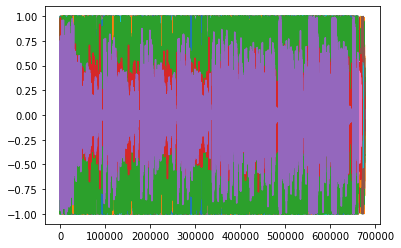

In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

path = "./data/GTZAN/wav"



correct_accumulate_dict = {'disco': 0, 'reggae': 0, 'pop': 0, 'rock': 0,
                           'metal': 0, 'jazz': 0, 'blues': 0, 'hiphop': 0, 'country': 0}

file_num_dict = {'disco': 0, 'reggae': 0, 'pop': 0, 'rock': 0,
                 'metal': 0, 'jazz': 0, 'blues': 0, 'hiphop': 0, 'country': 0}

# -- 1) binary-valued template matching
# -- 2) K-S template matching
# -- 3) harmonic template matching (you may try 𝛼 = 0.9).

# -- Using Cicular Shifting to generate another tone
binary_C_major = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
binary_C_minor = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]
# -- C, C#, D, D#, E, F, F#, G, G#, A, A#, B
KS_C_major = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
KS_C_minor = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0]

for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith((".wav")):
            print("============")

            txt_file_path = name.replace(".wav", ".lerch.txt")
            txt_file_path = txt_file_path.replace("wav", "key")
            print("txt_file_path = ", txt_file_path)
            genres = txt_file_path.split(".")[0]
            print("genres", genres)

            file_num_dict[genres] = file_num_dict[genres] + 1

            y, sr = librosa.load(
                r"./data/GTZAN/wav/" + genres + "/" + name)

            print(y.shape)
            print(sr)

            plt.plot(y)

            # -- STFT chromagram
            chroma_stft = librosa.feature.chroma_stft(
                y=y, sr=sr, n_chroma=12, n_fft=4096)
            # -- CQT chromagram
            chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
            # -- Chroma Energy Normalized chromagram
            chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
            print(chroma_cens.shape)  # 12 dim pitch, 1293 frames

            # -- Chromagram visualization
            # plt.figure(figsize=(15, 15))
            # plt.subplot(3, 1, 1)
            # librosa.display.specshow(chroma_stft, y_axis='chroma')
            # plt.title('chroma_stft')
            # plt.colorbar()
            # plt.subplot(3, 1, 2)
            # librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
            # plt.title('chroma_cqt')
            # plt.colorbar()
            # plt.subplot(3, 1, 3)
            # librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
            # plt.title('chroma_cens')
            # plt.colorbar()
            # plt.tight_layout()

            # plt.show()

            # compute x = 1/N sigma(i=1, N){Zi}
            avg_chromagram = []
            frame_n = chroma_stft.shape[1]
            for pitchs in range(chroma_stft.shape[0]):
                accumulate_value = 0
                for frames in range(chroma_stft.shape[1]):
                    accumulate_value += chroma_stft[pitchs][frames]
                avg_chromagram.append(accumulate_value/frame_n)

            print(avg_chromagram)

            inner_product = []

            # Major
            for i in range(12):
                #print(np.roll(binary_C_major, i))
                inner_product.append(
                    np.dot(avg_chromagram, np.roll(binary_C_major, i)))
            # minor
            for i in range(12):
                #print(np.roll(binary_C_minor, i))
                inner_product.append(
                    np.dot(avg_chromagram, np.roll(binary_C_minor, i)))

            # print(inner_product)
            maxindex = np.argmax(inner_product)
            # print(maxindex)

            scale = ['C', 'C#', 'D', 'D#', 'E', 'F',
                     'F#', 'G', 'G#', 'A', 'A#', 'B']

            annotation_major_scale = ['A', 'A#', 'B', 'C', 'C#',
                                      'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
            annotation_minor_scale = ['a', 'a#', 'b', 'c', 'c#',
                                      'd', 'd#', 'e', 'f', 'f#', 'g', 'g#']

            if maxindex / 12 < 1:
                print(scale[maxindex] + " Major")
            if maxindex / 12 == 1:
                print(scale[maxindex] + " minor")

            moving_scale = {0: '15', 1: '16', 2: '17', 3: '18', 4: '19', 5: '20',
                            6: '21', 7: '22', 8: '23', 9: '0', 10: '1', 11: '2',
                            12: '3', 13: '4', 14: '5', 15: '6', 16: '7', 17: '8',
                            18: '9', 19: '10', 20: '11', 21: '12', 22: '13', 23: '14',
                            }

            print("prediction", moving_scale[maxindex])

            with open("./data/GTZAN/key/" + genres + "/" + txt_file_path) as f:
                answer = f.readline().rstrip()
            print("answer", answer)

            print(moving_scale[maxindex] == answer)
            if (moving_scale[maxindex] == answer):
                correct_accumulate_dict[genres] = correct_accumulate_dict[genres] + 1
                #acc += 1

print(correct_accumulate_dict)
print(file_num_dict)

for i in range(len(correct_accumulate_dict)):
    print(genres_list[i], " Avg Accuracy = ", correct_accumulate_dict[genres_list[i]] /
          file_num_dict[genres_list[i]])
